In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/corn-or-maize-leaf-disease-dataset


In [23]:
BATCHSIZE = 32
LG_IMGSIZE = (256,256)
SM_IMGSIZE = (32,32)

In [24]:
dataDir = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    batch_size = BATCHSIZE,
    image_size = LG_IMGSIZE,
)

Found 4188 files belonging to 1 classes.


In [25]:
classNames = dataDir.class_names
classNames

['data']

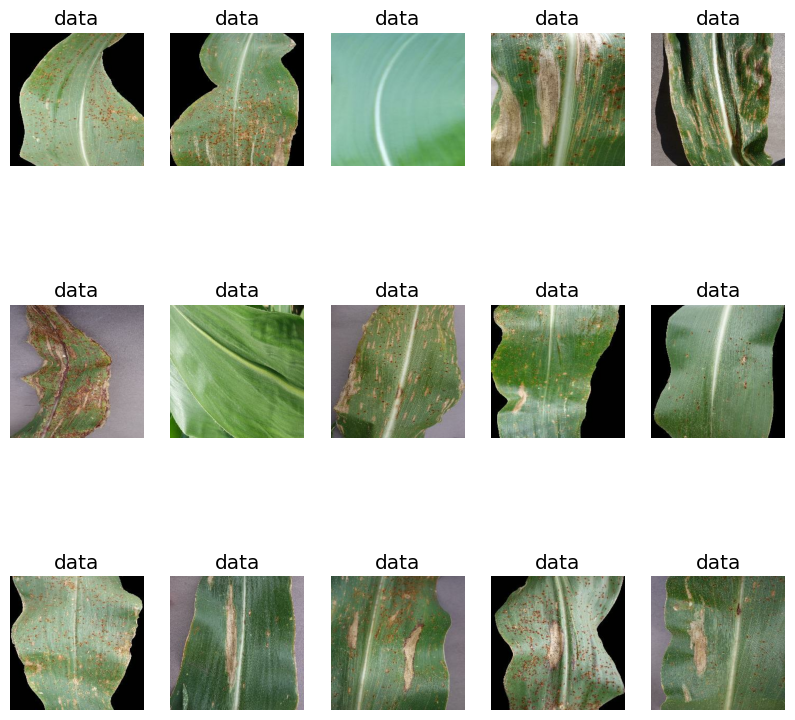

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in dataDir.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]], fontsize='x-large', fontweight='ultralight')
        plt.axis("off")

In [27]:
trainDS = tf.keras.utils.image_dataset_from_directory(
    path,
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    subset="training",
    seed=123,
    validation_split=0.2,
    shuffle=True
)

validDS = tf.keras.utils.image_dataset_from_directory(
    path,
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    subset="validation",
    seed=123,
    validation_split=0.2,
    shuffle=True
)

testDS = tf.keras.utils.image_dataset_from_directory(
    path,
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    seed=123,
    shuffle=True

)

Found 4188 files belonging to 1 classes.
Using 3351 files for training.
Found 4188 files belonging to 1 classes.
Using 837 files for validation.
Found 4188 files belonging to 1 classes.


In [28]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,180 (477.27 KB)

 Trainable params: 122,180 (477.27 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(trainDS, epochs=40, validation_data=(validDS))

Epoch 1/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.9691 - loss: 0.1448 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/40
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/40
105/105 ━━━━━━━━━━━━

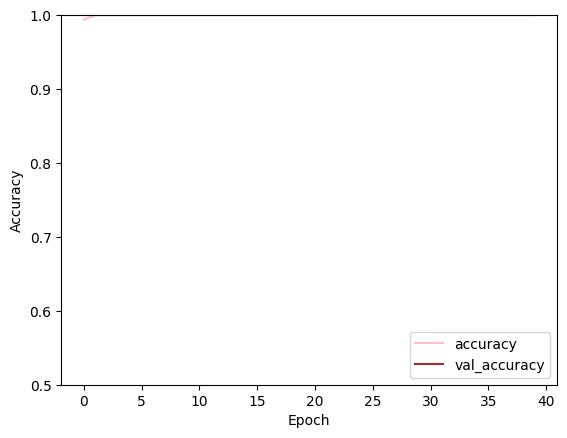

In [31]:
plt.plot(history.history['accuracy'], label='accuracy', color='pink')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='brown')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [32]:
test_loss, test_accuracy = model.evaluate(testDS, verbose=2)

131/131 - 8s - 63ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [33]:
print(test_accuracy)

1.0


In [34]:
yTrue = []
yPred = []

for images, labels in testDS:
    predictions = model.predict(images)
    predictClasses = np.argmax(predictions, axis=1)

    yTrue.extend(labels.numpy())
    yPred.extend(predictClasses)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━

In [35]:
cr = classification_report(yTrue, yPred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4188

    accuracy                           1.00      4188
   macro avg       1.00      1.00      1.00      4188
weighted avg       1.00      1.00      1.00      4188



[[4188]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


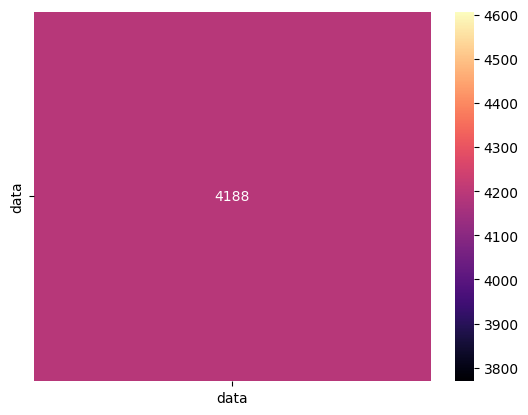

In [36]:
cf = confusion_matrix(yTrue, yPred)

sns.heatmap(cf, annot=True, fmt='g', cmap='magma', xticklabels=classNames, yticklabels=classNames)
print(cf)

In [37]:
model1 = models.Sequential()
model1.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model1.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history1 = model1.fit(trainDS, epochs=4, validation_data=(validDS))

Epoch 1/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 1.0000 - loss: 5.8155e-07 - val_accuracy: 1.0000 - val_loss: 5.1415e-08
Epoch 2/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 1.0000 - loss: 4.2530e-07 - val_accuracy: 1.0000 - val_loss: 4.0591e-08
Epoch 3/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 1.0000 - loss: 3.3112e-07 - val_accuracy: 1.0000 - val_loss: 3.3470e-08
Epoch 4/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 1.0000 - loss: 3.4761e-07 - val_accuracy: 1.0000 - val_loss: 2.8342e-08


In [40]:
test_loss, test_accuracy = model1.evaluate(testDS, verbose=2)

131/131 - 8s - 63ms/step - accuracy: 1.0000 - loss: 2.6712e-07


In [41]:
model2 = models.Sequential()
model2.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4))

In [43]:
model2.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history2 = model2.fit(trainDS, epochs=4, validation_data=(validDS))

Epoch 1/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 1.0000 - loss: 1.0556e-05 - val_accuracy: 1.0000 - val_loss: 4.7325e-07
Epoch 2/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 1.0000 - loss: 2.7802e-06 - val_accuracy: 1.0000 - val_loss: 2.0224e-07
Epoch 3/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 1.0000 - loss: 1.5519e-06 - val_accuracy: 1.0000 - val_loss: 1.1892e-07
Epoch 4/4
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 1.0000 - loss: 8.9952e-07 - val_accuracy: 1.0000 - val_loss: 8.0611e-08


In [44]:
test_loss, test_accuracy = model2.evaluate(testDS, verbose=2)

131/131 - 7s - 55ms/step - accuracy: 1.0000 - loss: 6.1030e-07
